In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from scipy.stats import sem
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
from sklearn.metrics import precision_recall_curve
import pickle
warnings.filterwarnings("ignore")
%matplotlib inline

### Removing null values

In [2]:
#get rid of unnecesarry columns
#get rid of unnecessary data

test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

#In some columns there are a missing value as "?" but we should convert actual None 
test_data = test_data.replace('?', np.nan)
train_data = train_data.replace('?', np.nan)

def about_data(df):
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values
#There are 3 columns have null value. we can drop it because of percentage of missing value very low
test_data.dropna(inplace=True,axis=0)
train_data.dropna(inplace=True,axis=0)


about_data(test_data)
about_data(train_data)

,columns,total missing,ration of missing
0,age,0,0.0
1,workclass,0,0.0
2,fnlwgt,0,0.0
3,education,0,0.0
4,educational-num,0,0.0
5,marital-status,0,0.0
6,occupation,0,0.0
7,relationship,0,0.0
8,race,0,0.0
9,gender,0,0.0


### Data Visualization

In [3]:
train_data.info()

train_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 40727 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              40727 non-null  int64 
 1   workclass        40727 non-null  object
 2   fnlwgt           40727 non-null  int64 
 3   education        40727 non-null  object
 4   educational-num  40727 non-null  int64 
 5   marital-status   40727 non-null  object
 6   occupation       40727 non-null  object
 7   relationship     40727 non-null  object
 8   race             40727 non-null  object
 9   gender           40727 non-null  object
 10  capital-gain     40727 non-null  int64 
 11  capital-loss     40727 non-null  int64 
 12  hours-per-week   40727 non-null  int64 
 13  native-country   40727 non-null  object
 14  income_>50K      40727 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,0
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1


In [4]:
train_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,40727.000000,4.072700e+04,40727.000000,40727.000000,40727.000000,40727.000000,40727.000000
mean,38.521251,1.897859e+05,10.113512,1118.639944,89.243450,40.908464,0.247796
std,13.243211,1.059021e+05,2.557084,7639.841297,406.568894,12.014493,0.431738
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173630e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.782820e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.381530e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [5]:
# sns.pairplot(train_data,hue='income_>50K',corner=True)

In [6]:
# sns.heatmap(train_data.corr(), annot = True)

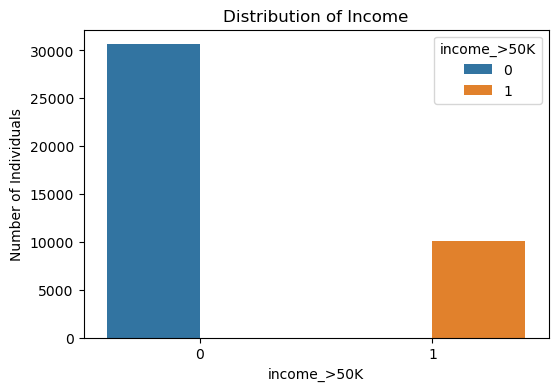

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='income_>50K', hue='income_>50K', data=train_data)
plt.title('Distribution of Income')
plt.ylabel('Number of Individuals')
plt.show()

<Axes: xlabel='income_>50K', ylabel='age'>

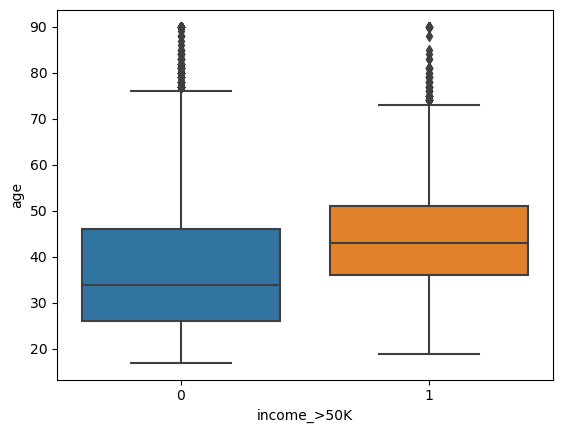

In [8]:
sns.boxplot(data = train_data, x='income_>50K', y='age')

<Axes: title={'center': 'Distribution of Income by Industry'}, xlabel='workclass', ylabel='count'>

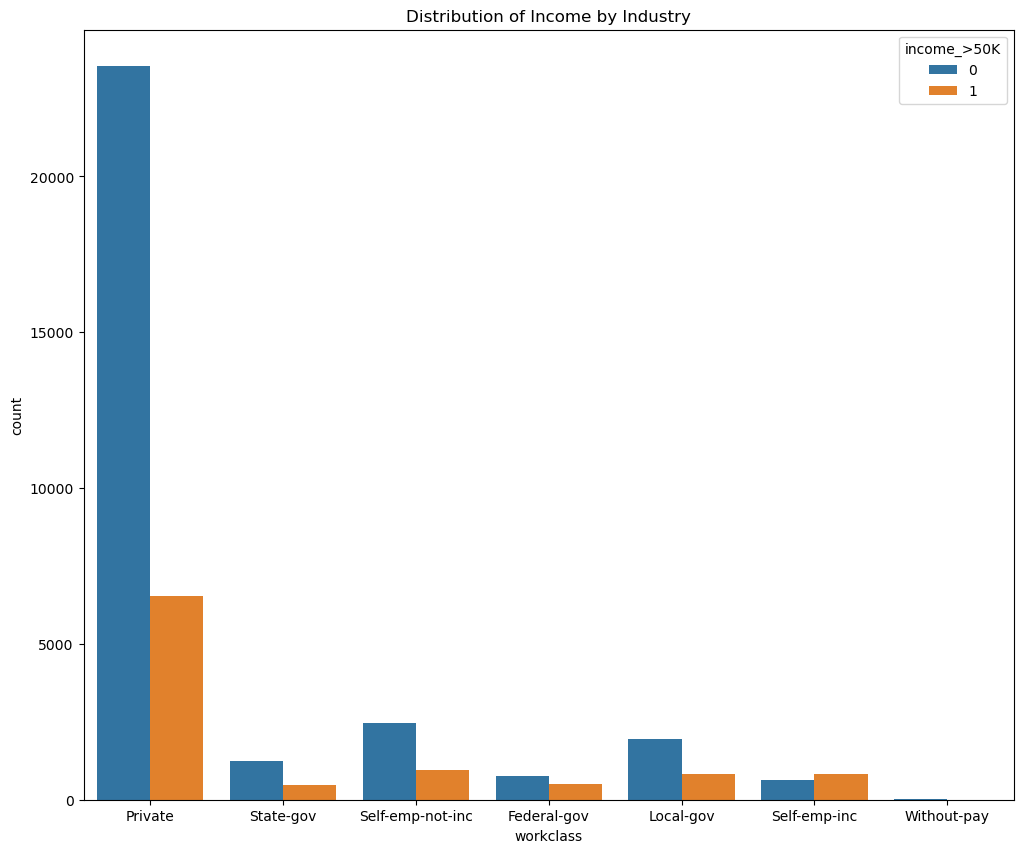

In [9]:
plt.figure(figsize=(12, 10))
plt.title('Distribution of Income by Industry')
plt.ylabel('Number of Individuals')
sns.countplot(x='workclass', hue='income_>50K', data=train_data)

<Axes: xlabel='race', ylabel='Count'>

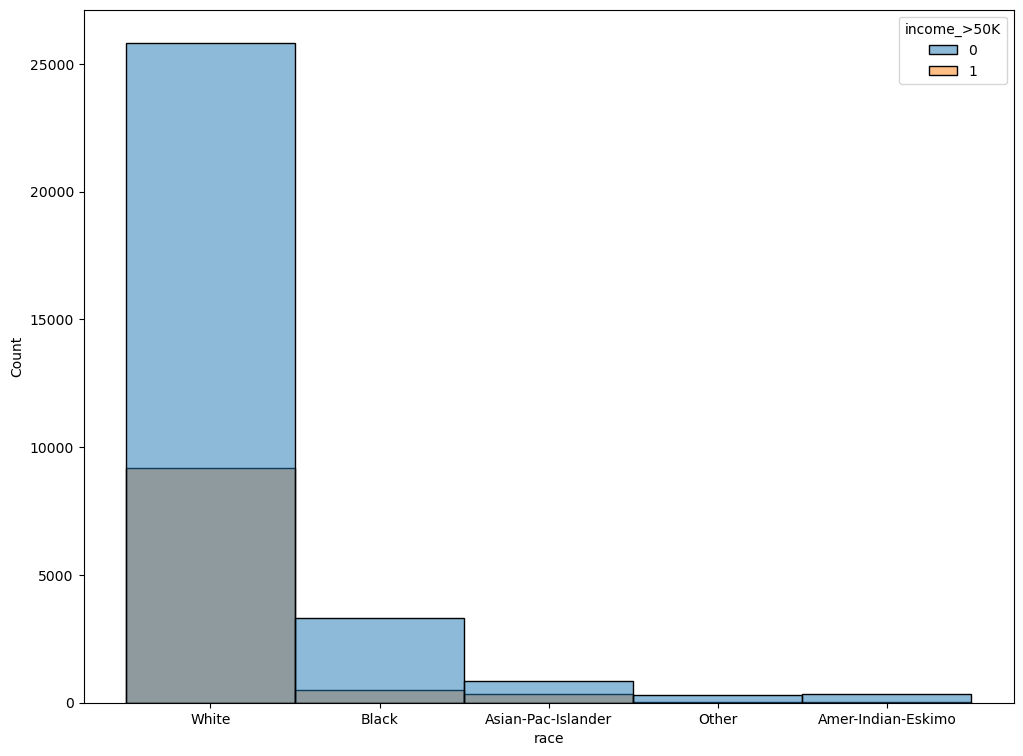

In [10]:
plt.figure(figsize=(12, 9))
sns.histplot(x=train_data['race'], hue=train_data['income_>50K'])

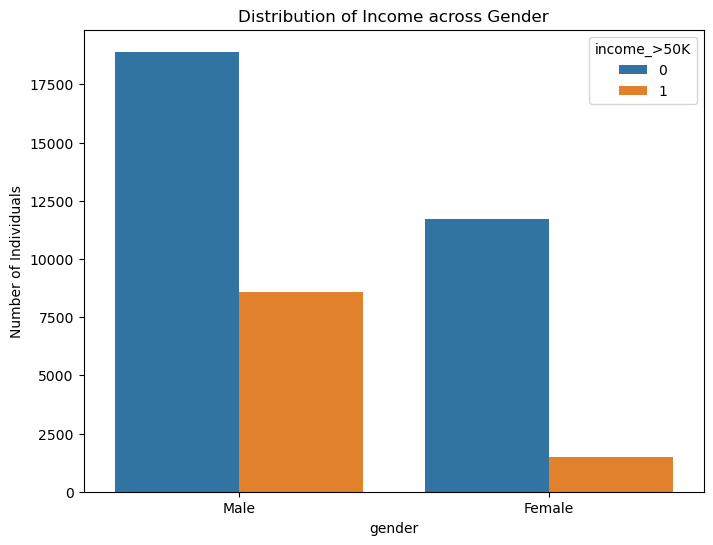

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='income_>50K', data=train_data)
plt.title('Distribution of Income across Gender')
plt.ylabel('Number of Individuals')
plt.show()

<Axes: xlabel='education', ylabel='count'>

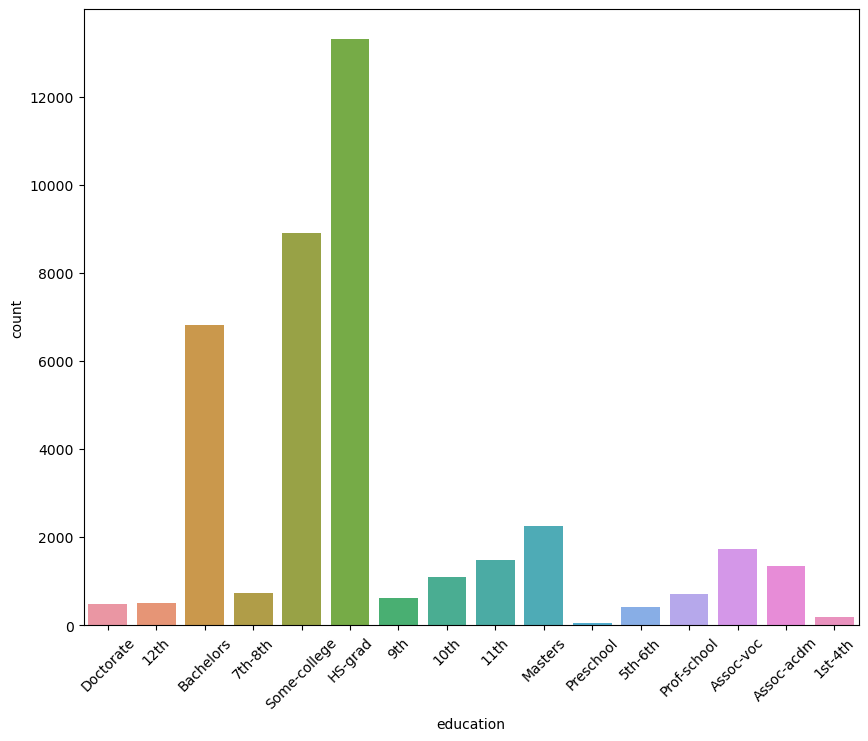

In [12]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)
sns.countplot(data=train_data, x = 'education')

<Axes: xlabel='occupation', ylabel='count'>

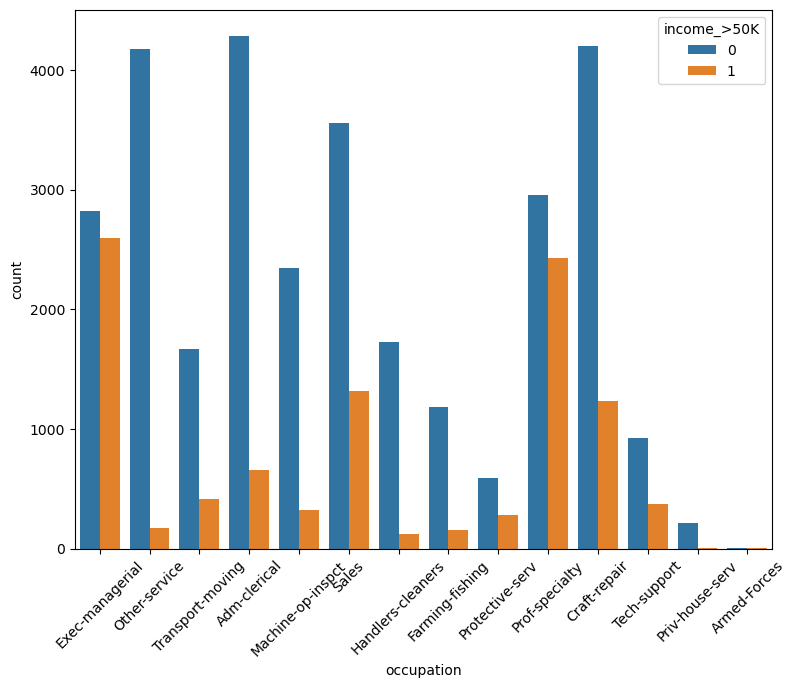

In [13]:
plt.figure(figsize=(9, 7))
plt.xticks(rotation=45)
sns.countplot(x='occupation', hue='income_>50K', data=train_data)

([<matplotlib.patches.Wedge at 0x28933f650>,
 [Text(-0.783183712809373, 0.772413925295321, '0'),
  Text(0.7831837128093729, -0.7724139252953212, '1')],
 [Text(-0.42719111607783977, 0.42131668652472054, '75.22%'),
  Text(0.4271911160778397, -0.4213166865247206, '24.78%')])

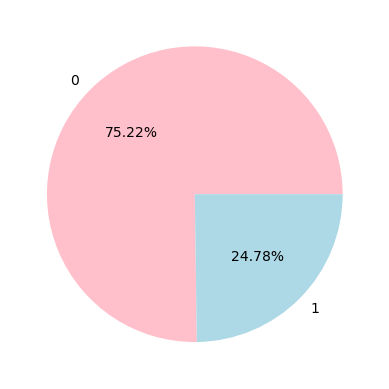

In [14]:
class_counts = train_data['income_>50K'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct= '%2.2f%%', colors=['pink', 'lightblue'])


Correcting the imbalanced data

In [15]:
minority_data = train_data[train_data['income_>50K'] == 1]
majority_data = train_data[train_data['income_>50K'] == 0]

df_dumy = pd.get_dummies(train_data, columns = ['education', 'workclass','educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'])
X = df_dumy.drop("income_>50K",axis=1)
print(X)
y = df_dumy["income_>50K"]


minority_count = len(minority_data)
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=101)
#scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


### Logistic Regression

In [18]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(scaled_X_train, y_train)

pickle.dump(logistic, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

print(scaled_X_test[0])

pred = logistic.predict(scaled_X_test)

accuracy = accuracy_score(y_test, pred)
class_report = classification_report(y_test, pred)

accuracy
#class_report

[-0.97888162 -0.55482395 -0.19517394 -0.25721554  1.46896519 -0.14512169
 -0.16479813 -0.09955086 -0.05916815 -0.08577572 -0.11816642 -0.10789062
 -0.19012531 -0.21125164 -0.50973004 -0.13945017  1.5792104  -0.29442265
 -0.03320988 -0.17644914 -0.51068275 -0.19626151 -0.2793437   0.64231211
 -0.23134058 -0.30974484 -0.21402927 -0.02119044 -0.03320988 -0.05916815
 -0.08577572 -0.11816642 -0.10789062 -0.14512169 -0.16479813 -0.09955086
  1.5792104  -0.51068275 -0.21125164 -0.19012531 -0.50973004 -0.29442265
 -0.17644914 -0.13945017 -0.35656899 -0.02893375 -1.20601896 -0.10079747
  1.79152169 -0.15513927 -0.15228832 -0.3392488  -0.0196921  -0.38714536
 -0.4592705  -0.16518955 -0.18815808 -0.23964061  3.477841   -0.05899429
 -0.45225158 -0.1540324  -0.37230296 -0.18517346 -0.22724961 -1.05194304
  1.9357976  -0.1492452  -0.3354601  -0.29401332 -0.25610229 -0.08955669
 -0.17736904 -0.29450447 -0.08093647  0.37757662 -0.60362246  0.60362246
 -0.02928477 -0.06138421 -0.05294185 -0.03727237 -0

0.8166313040639791

### Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled_nn = scaler.fit_transform(X_ros)
X_nn = pd.DataFrame(data = X_rescaled_nn, columns = X.columns)
y_nn = pd.get_dummies(y_ros)

data_train, data_test, class_train, class_test = train_test_split(X_nn, y_nn, test_size=0.1)
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

mlp.fit(data_train, class_train)

pred = mlp.predict(data_test)
pred

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print(pred[:5])
print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.8323812632609761
Mean Square Error :  0.167618736739024
[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]
Confusion Matrix for each label : 
[[[2720  408]
  [ 619 2380]]

 [[2380  619]
  [ 408 2720]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2999
           1       0.81      0.87      0.84      3128

   micro avg       0.83      0.83      0.83      6127
   macro avg       0.83      0.83      0.83      6127
weighted avg       0.83      0.83      0.83      6127
 samples avg       0.83      0.83      0.83      6127



### Hyperparameter Tuning for Neural Network

In [ ]:
# max_iterations = [500,800,1000]
# hidden_layer_siz = [(5, 7), (7, 13), (13, 10)]
# learning_rates = 0.15 * np.arange(1, 3)

# param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations)

# grid = GridSearchCV(estimator = mlp, param_grid = param_grid)
# grid.fit(X_nn, y_nn)

In [ ]:
print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

Optimal Hyper-parameters :  {'hidden_layer_sizes': (13, 10), 'learning_rate_init': 0.3, 'max_iter': 500}
Optimal Accuracy :  0.8051085359882487


### Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier  
# RFC = RandomForestClassifier(n_estimators=100, max_features=3)  
# RFC.fit(scaled_X_train, y_train) 

# pred2 = RFC.predict(scaled_X_test)
# accuracy = accuracy_score(y_test, pred2)
# print(accuracy)

0.9225559001142484


In [ ]:
results = []
names_of_models = []

model_list = [('LR', LogisticRegression()),
             ('KNN', KNeighborsClassifier())]


for name, model in model_list:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names_of_models.append(name)
    res = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(res)


LR: 0.8208659142096391 (0.006893467803302869)
KNN: 0.8250185549286725 (0.004699924408619773)


Retrain with tuned parameters

In [ ]:
tuned_model_rf = RandomForestClassifier(n_estimators=150,max_features=5)
tuned_model_rf.fit(scaled_X_train, y_train)
predictions = tuned_model_rf.predict(scaled_X_test)

performance

In [ ]:
accuracy_score(y_test,predictions)
print(classification_report(y_test,predictions))

K neighbors classifier

Loss Graphs for different models

Graph 2 (distribution of features)

Graph 3 (above vs below 50k)